In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

Import test and training data  
Concatenate into combined dataframe for feature engineering

In [3]:
df_train = pd.read_csv("../resources/train.csv")
df_test = pd.read_csv("../resources/test.csv")
combine = pd.concat([df_train, df_test], sort=False)

In [3]:
df_train.shape, df_test.shape, combine.shape

((15120, 56), (565892, 55), (581012, 56))

In [4]:
df_test.iloc[:5, ]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [5]:
combine.iloc[15120:15125, ]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,NaN
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,NaN
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,NaN
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,NaN
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,NaN


The combine seems to have worked

**To do**  
Deal with missing data **Done**  
Look for patterns **In Progress**  
Feature Engineering  
Standardize features  
Train models  
Test

In [6]:
combine.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
df_train['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [8]:
#combine[combine.notnull()].count()

Write syntax for showing the rows with a null value in one column

In [9]:
d = {'col1': [1, 2, 3, None], 
     'col2': [None, 2, 3, 4],
     'col3': [None, None, 2, 3]}
df_na = pd.DataFrame(data=d)
df_na

,col1,col2,col3
0,1.0,NaN,NaN
1,2.0,2.0,NaN
2,3.0,3.0,2.0
3,NaN,4.0,3.0


In [10]:
df_na[df_na.apply(lambda x: x.count(), axis=1) != 3]

,col1,col2,col3
0,1.0,NaN,NaN
1,2.0,2.0,NaN
3,NaN,4.0,3.0


In [11]:
#df_train[df_train.apply(lambda x: x.count(), axis=1) != 56]

In [12]:
#df_test[df_test.apply(lambda x: x.count(), axis=1) != 55]

No null values

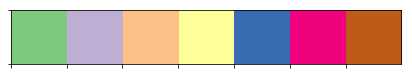

In [5]:
cust_palette = {
    1: '#7fc97f',
    2: '#beaed4',
    3: '#fdc086',
    4: '#ffff99',
    5: '#386cb0',
    6: '#f0027f',
    7: '#bf5b18'
}
sns.set_palette(['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f','#bf5b18'])
sns.palplot(pal=['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f','#bf5b18'])

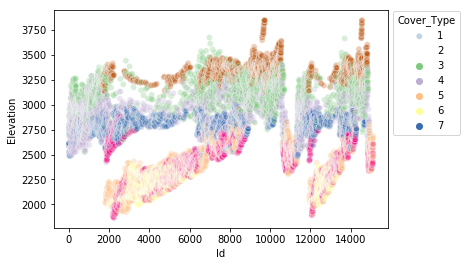

In [6]:
g = sns.scatterplot(data=df_train, x='Id', y='Elevation', hue='Cover_Type', alpha=.3, palette=cust_palette)
g.legend(range(1, 8), bbox_to_anchor=(1, 1.02), title='Cover_Type')

Visual differences in Cover Type by Elevation  
**To do**  
**Done** (FeatEng.ipynb) Create categories for Elevation, eg <3000, 3000-3250, >3250  

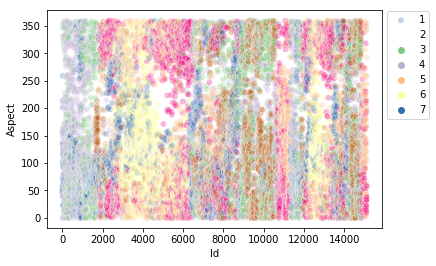

In [15]:
g = sns.scatterplot(data=df_train, x='Id', y='Aspect', hue='Cover_Type', alpha=.3, palette=cust_palette)
g.legend(range(1, 8), bbox_to_anchor=(1, 1.02))

No discernible differences in Cover Type by Aspect  
*Hypothesis*: The bands of Cover Type by Id come from differences in aspect within groups of same Cover Type  

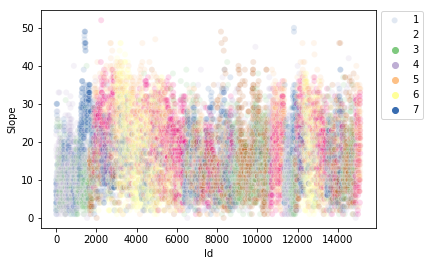

In [16]:
g = sns.scatterplot(data=df_train, x='Id', y='Slope', hue='Cover_Type', alpha=.15, palette=cust_palette)
g.legend(range(1, 8), bbox_to_anchor=(1, 1.02))
#Changed alpha from to .15 after initial run to get closer look at low-valued cover types

Suspect that the same thing is happening with slope as with aspect  
There could be a concentration of low-value Cover Type at lower slopes  
**To do**  
**Done** Find proportion of Cover Type by Slope and maybe make categories, eg <20 and >20  

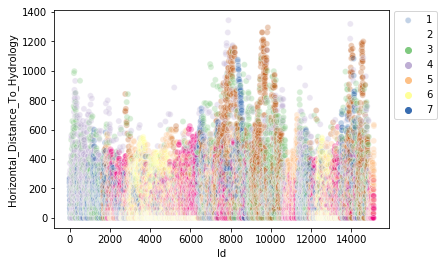

In [17]:
g = sns.scatterplot(data=df_train, x='Id', y='Horizontal_Distance_To_Hydrology', hue='Cover_Type', alpha=.3, palette=cust_palette)
g.legend(range(1, 8), bbox_to_anchor=(1, 1.02))

Possible relationship between high HDH and high-valued cover types  
**To do**  
**Done** Look at proportion of cover types in HDH group >600/>800  

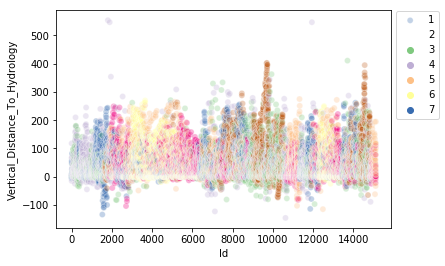

In [18]:
g = sns.scatterplot(data=df_train, x='Id', y='Vertical_Distance_To_Hydrology', hue='Cover_Type', alpha=.3, palette=cust_palette)
g.legend(range(1, 8), bbox_to_anchor=(1, 1.02))

Possible relationship between high VDH and high-valued cover types  
Possible relationship between negative VDH and high-valued cover types  
**To do**  
**Done** Look at proportion of cover types in VDH group >200 and <0  

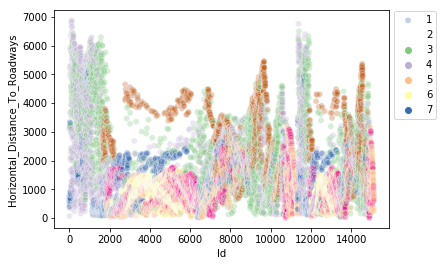

In [19]:
g = sns.scatterplot(data=df_train, x='Id', y='Horizontal_Distance_To_Roadways', hue='Cover_Type', alpha=.3, palette=cust_palette)
g.legend(range(1, 8), bbox_to_anchor=(1, 1.02))

Cool pattern!  
Possible grouping of mid-valued Cover Types at low HDR and of high-valued Cover Types at mid HDR  
**To do**  
**Done** Look for groupings of HDR, eg <2000, 2000-5000, >5000  

In [20]:
combine[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].describe()

,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
count,581012.000000,581012.000000,581012.000000
mean,212.146049,223.318716,142.528263
std,26.769889,19.768697,38.274529
min,0.000000,0.000000,0.000000
25%,198.000000,213.000000,119.000000
50%,218.000000,226.000000,143.000000
75%,231.000000,237.000000,168.000000
max,254.000000,254.000000,254.000000


Hillshade at 9 and Noon look very similar from summary statistics  
**To do**  
**Done** Consider combining 9 and Noon  
**Done** Look at shape of distribution for each hillshade

/home/eric/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


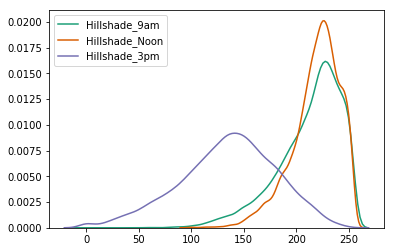

In [21]:
cmap = {'Hillshade_9am': '#1b9e77', 'Hillshade_Noon': '#d95f02', 'Hillshade_3pm': '#7570b3'}

g = sns.kdeplot(df_train['Hillshade_9am'], color=cmap['Hillshade_9am'])
g = sns.kdeplot(df_train['Hillshade_Noon'], color=cmap['Hillshade_Noon'])
g = sns.kdeplot(df_train['Hillshade_3pm'], color=cmap['Hillshade_3pm'])

Hillshade 9am and Noon have visually similar distributions as well as similar summary statistics  
3pm has a distinct distribution  
**To do**  
**Done** Would be curious if Cover Type had a different relationship to Hillshade at 9am and Noon

Text(0.5,1,'Hillshade_3pm')

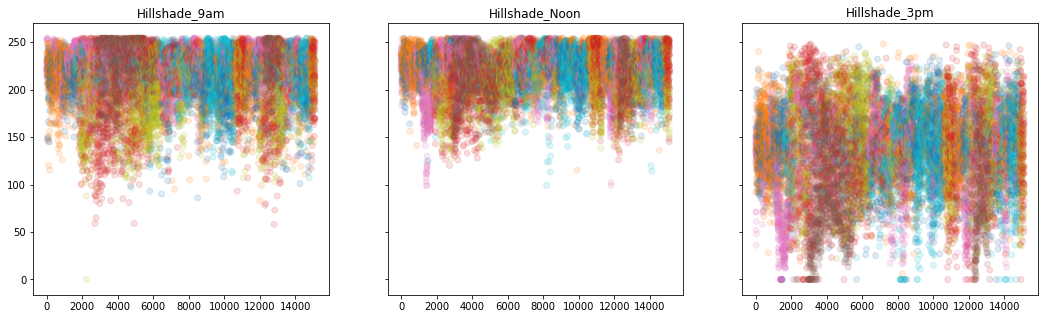

In [22]:
fig, (g1, g2, g3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18, 5))
g1.scatter(data=df_train, x='Id', y='Hillshade_9am', c='Cover_Type', alpha=.15, cmap='tab10')
g2.scatter(data=df_train, x='Id', y='Hillshade_Noon', c='Cover_Type', alpha=.15, cmap='tab10')
g3.scatter(data=df_train, x='Id', y='Hillshade_3pm', c='Cover_Type', alpha=.15, cmap='tab10')
g1.set_title('Hillshade_9am')
g2.set_title('Hillshade_Noon')
g3.set_title('Hillshade_3pm')

No visible difference in Cover Type according to Hillshade at any time  
**To do**  
Add legend for Cover Types

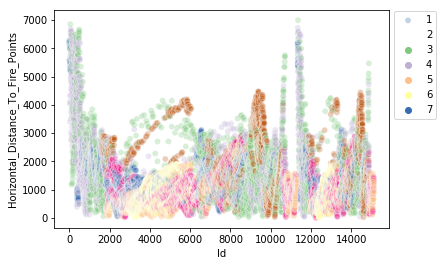

In [23]:
g = sns.scatterplot(data=df_train, x='Id', y='Horizontal_Distance_To_Fire_Points', hue='Cover_Type', alpha=.3, palette=cust_palette)
g.legend(range(1, 8), bbox_to_anchor=(1, 1.02))

Possible grouping of high valued cover types at middle HDFP and of middle values at low HDFP  
Will run again at lower alpha

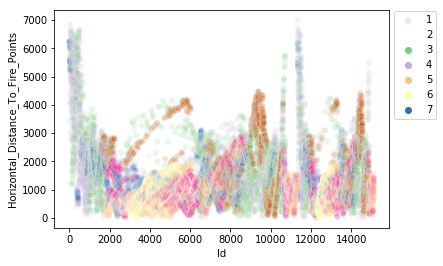

In [24]:
g = sns.scatterplot(data=df_train, x='Id', y='Horizontal_Distance_To_Fire_Points', hue='Cover_Type', alpha=.15, palette=cust_palette)
g.legend(range(1, 8), bbox_to_anchor=(1, 1.02))

**To do**  
**Done** Find proportion of high-valued cover type at mid to low HDFP, unsure of a trend  
**Done** Look at proportion of middle valued cover types, 4 and 5, at low HDFP, eg < 3000

In [25]:
def Wild_Area_Cat(row):
    if row['Wilderness_Area1'] == 1:
        return 1
    elif row['Wilderness_Area2'] == 1:
        return 2
    elif row['Wilderness_Area3'] == 1:
        return 3
    elif row['Wilderness_Area4'] == 1:
        return 4

Test function for categorizing Wilderness Areas  

In [26]:
df_train[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']][df_train['Wilderness_Area1'] == 0].head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
1620,0,0,1,0
1622,0,0,1,0
1623,0,0,1,0
1624,0,0,1,0
1627,0,0,1,0


In [27]:
df_train.iloc[1620:1628, :][['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']]

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
1620,0,0,1,0
1621,1,0,0,0
1622,0,0,1,0
1623,0,0,1,0
1624,0,0,1,0
1625,1,0,0,0
1626,1,0,0,0
1627,0,0,1,0


In [28]:
for i in range(1620, 1628):
    print(Wild_Area_Cat(df_train.iloc[i, :]))

3
1
3
3
3
1
1
3


Wild_Area_Cat behaves as desired

Came up with new idea  
Divide df_train by Wilderness area and use subplots  
*Keep categorizing function, just in case*

In [29]:
area1Cover = df_train['Id'][df_train['Wilderness_Area1'] == 1].groupby(by=df_train['Cover_Type']).count()
area1Dict = {}
for i in range(1, 8):
    try:
        area1Dict[str(i)] = area1Cover[i]
    except KeyError:
        area1Dict[str(i)] = 0
area1Dict

{'1': 1062, '2': 1134, '3': 0, '4': 0, '5': 856, '6': 0, '7': 545}

Code for count behaves as desired  
Turn Cover Type into hashable data type, string

In [30]:
area2Cover = df_train['Id'][df_train['Wilderness_Area2'] == 1].groupby(by=df_train['Cover_Type']).count()
area2Dict = {}
for i in range(1, 8):
    try:
        area2Dict[str(i)] = area2Cover[i]
    except KeyError:
        area2Dict[str(i)] = 0
area2Dict

{'1': 181, '2': 66, '3': 0, '4': 0, '5': 0, '6': 0, '7': 252}

In [31]:
area3Cover = df_train['Id'][df_train['Wilderness_Area3'] == 1].groupby(by=df_train['Cover_Type']).count()
area3Dict = {}
for i in range(1, 8):
    try:
        area3Dict[str(i)] = area3Cover[i]
    except KeyError:
        area3Dict[str(i)] = 0
area3Dict

{'1': 917, '2': 940, '3': 863, '4': 0, '5': 1304, '6': 962, '7': 1363}

In [32]:
area4Cover = df_train['Id'][df_train['Wilderness_Area4'] == 1].groupby(by=df_train['Cover_Type']).count()
area4Dict = {}
for i in range(1, 8):
    try:
        area4Dict[str(i)] = area4Cover[i]
    except KeyError:
        area4Dict[str(i)] = 0
area4Dict

{'1': 0, '2': 20, '3': 1297, '4': 2160, '5': 0, '6': 1198, '7': 0}

Text(0.5,1,'Wilderness_Area4')

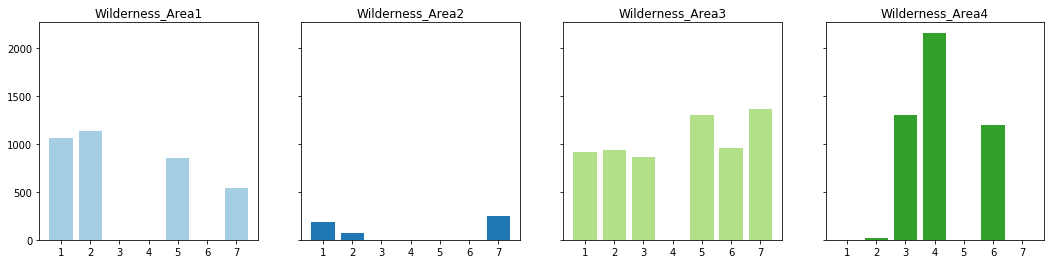

In [38]:
fig, (g1, g2, g3, g4) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(18, 4))
g1.bar(x=list(area1Dict.keys()),
       height=list(area1Dict.values()),
      color='#a6cee3')
g2.bar(x=list(area2Dict.keys()),
       height=list(area2Dict.values()),
      color='#1f78b4')
g3.bar(x=list(area3Dict.keys()),
       height=list(area3Dict.values()),
      color='#b2df8a')
g4.bar(x=list(area4Dict.keys()),
       height=list(area4Dict.values()),
      color='#33a02c')
g1.set_title('Wilderness_Area1')
g2.set_title('Wilderness_Area2')
g3.set_title('Wilderness_Area3')
g4.set_title('Wilderness_Area4')

Wilderness Area1 has similar numbers of cover types 1 and 2, and decreasing amounts of 5 and 7  
Area2 has very few observations, but all are of cover type 7, 1, and 2 in decreasing order  
Area3 had similar amounts of types 5 and 7 and of 1, 2, 3 and 6. The only type not represented is 4  
Area4 has many type 4, similar amounts of 3 and 6 and very few type 2  
**Observations**  
Cover Type 4 is only observed in Area4  
Cover Type 5 is only observed in Areas 1 and 3  
Area2 has too few observations to conclude any trends  
**To do**  
**Done** Look at proportions of each wilderness area in combined data

In [36]:
soilTypes = combine.columns[combine.columns.str.contains(r'^Soil')]
soilTypes

Index(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [37]:
Soil1Cover = df_train['Id'][df_train['Soil_Type1'] == 1].groupby(by=df_train['Cover_Type']).count()
Soil1Dict = {}
for i in range(1, 8):
    try:
        Soil1Dict[str(i)] = Soil1Cover[i]
    except KeyError:
        Soil1Dict[str(i)] = 0
Soil1Dict

{'1': 0, '2': 0, '3': 121, '4': 139, '5': 0, '6': 95, '7': 0}

Looks like there could be useful relationships within the Soil Types

In [89]:
SoilDictAll = []
SoilDict = {}
for type in soilTypes: #Loop through soil types
    SoilCover = df_train['Id'][df_train[type] == 1].groupby(by=df_train['Cover_Type']).count() #Make Series for the soil type
    
    if len(SoilCover) == 0: #Catch error edge case found in Soil_Type7
        SoilDict = { '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0}
    else:
        for i in range(1, 8): #Make dict for cover type counts by soil type
            try:
                SoilDict[str(i)] = SoilCover[i]
            except KeyError:
                SoilDict[str(i)] = 0
    
    SoilDictAll.append(SoilDict) #Add dict to list for all soil types
    
    SoilDict = {} #Reset dict for next soil type

In [62]:
df_train['Id'][df_train['Soil_Type3'] == 1].groupby(by=df_train['Cover_Type']).count()

Cover_Type
2     12
3    133
4    799
6     18
Name: Id, dtype: int64

In [90]:
SoilDictAll[2]

{'1': 0, '2': 12, '3': 133, '4': 799, '5': 0, '6': 18, '7': 0}

Dict of soil types constructed correctly

In [92]:
fig, axs = plt.subplots(5, 8, sharey=True, figsize=(200, 100))

for i in range(5): #Plot bar graphs for each soil type
    for j in range(8):
        axs[i][j].bar(x=list(SoilDictAll[j + 8 * i].keys()),
                  height=list(SoilDictAll[j + 8 * i].values()),
                  color='#004fce')
        axs[i][j].set_title('Soil_Type{}'.format(j + 8 * i + 1))

Looks like a whole bunch of insignificant relationships  
Suspect that there are not enough observations of most soil types in df_train to draw conclusions  
See some *weak* similarities in cover type counts by soil type, eg ST 5-6, 22-24, ~29-33, or 38-40  
**To do**  
Look up whether there are similarities between soil types with consecutive numbers

In [34]:
combine.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_